In [1]:
#import modules:
import mogreps
import netCDF4
from pathlib import Path
#(module for transforming coordinate systems)
import cartopy.crs as ccrs

from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)

Code to extract the list of keys for the different variables.

In [2]:
#first realisation:
f = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk',2013,2,1,3,0,3),data_folder=Path('.')  )

#mogreps.make_data_object_name
data_set = netCDF4.Dataset(f)
data_set.variables.keys()

File prods_op_mogreps-uk_20130201_03_00_003.nc already exists.


odict_keys(['wet_bulb_potential_temperature', 'rotated_latitude_longitude', 'time', 'pressure', 'grid_latitude', 'grid_longitude', 'forecast_period', 'forecast_reference_time', 'cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_2p5_oktas', 'time_0', 'forecast_period_0', 'cloud_area_fraction_assuming_maximum_random_overlap', 'stratiform_snowfall_rate', 'time_1', 'forecast_period_1', 'wet_bulb_freezing_level_altitude', 'time_2', 'forecast_period_2', 'air_pressure_at_sea_level', 'air_temperature', 'pressure_0', 'air_temperature_0', 'height', 'air_temperature_1', 'time_3', 'time_3_bnds', 'forecast_period_3', 'forecast_period_3_bnds', 'air_temperature_2', 'dew_point_temperature', 'fog_area_fraction', 'geopotential_height', 'pressure_1', 'high_type_cloud_area_fraction', 'low_type_cloud_area_fraction', 'medium_type_cloud_area_fraction', 'relative_humidity', 'relative_humidity_0', 'specific_humidity', 'stratiform_rainfall_amount', 'forecast_period_4', 'forecast_period

Look at specific variables.

In [3]:
#print( data_set.variables.keys() ) 

"""
for k in data_set.variables.keys() : 
    print("key = " + str(k))
    value = data_set.variables[k][0]
    print(value)
"""

    
print( type( data_set.variables ['air_temperature_2'][0] )  ) 

<class 'numpy.ma.core.MaskedArray'>


Some functions to pull out the data. (to put these in a Python script at a later date). 

In [7]:
def Month_Map(month_str) : 

    """
    Function to converty months as 3 letter strings to
    corresponding int between 0 and 11.
    month_str : str
    """
    
    Month_Dict = { "Jan" : 0,  "Feb" : 1, "Mar" : 2, "Apr" : 3 , "May" : 4, "Jun" : 5, "Jul" : 6 , "Aug" : 7 , "Sep" : 8, "Oct" : 9 , "Nov" : 10 , "Dec" : 11}
    
    return Month_Dict[month_str]


def Pull_Out_Location_Array(variable_name,grid_loc_1,grid_loc_2,year,month,day,hour,forecast_period) : 
    
    
    num_ensemble_members = 12
    
    Property_Array = [ ]
    
    for i in range(num_ensemble_members) : 
        f = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk',year,Month_Map(month),day,hour,i,forecast_period),data_folder=Path('.')  )
        data_set = netCDF4.Dataset(f)
        value = data_set.variables[variable_name][0][grid_loc_1][grid_loc_2]
        Property_Array.append(value)
    
    return Property_Array


def Plot_Variables_Against(variable_1,variable_2,grid_loc_1,grid_loc_2,year,month,day,hour,forecast_period) : 
    
    """
    Plot two variables at a specified location against each other.
    
    """
    
    array_1 =  Pull_Out_Location_Array(variable_1,grid_loc_1,grid_loc_2,year,month,day,hour,forecast_period)
    array_2 = Pull_Out_Location_Array(variable_2,grid_loc_1,grid_loc_2,year,month,day,hour,forecast_period)
    
    plt.scatter(array_1,array_2)
    plt.title( str(year) + " " + month + " " + str(day) + " at " + str(hour) + "H at location " + str((grid_loc_1,grid_loc_2)) )
    plt.xlabel(variable_1)
    plt.ylabel(variable_2)
    plt.show()

import time   
def Plot_Variance_in_Property(variable_name,year,month,day,hour,forecast_period) : 

    """
    
    Plot the variance in a given property across the ensembles
    for a given time period.
    
    """
    
    x_len = 547
    y_len = 420
    
    x_len = 10
    y_len = 10
    
    #emptry array for matrix values:
    Value_Matrix = np.zeros( (x_len,y_len) )
    
    for i in range(x_len) : 
        for j in range(y_len) : 
            print("i=" + str(i) + "j=" + str(j))
            time.sleep(1)
            Property_Array = Pull_Out_Location_Array(variable_name,i,j,year,month,day,hour,forecast_period)
            Value_Matrix[i][j] = np.var(Property_Array)
            print("Variance = " + str(np.var(Property_Array)) )
    
    
            fig = plt.figure()
            #First subplot in a 1x1 grid
            ax = fig.add_subplot(111)
            plt.pcolormesh(Value_Matrix,cmap='brg')
            plt.show()

    
    

i=0j=0
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5897352


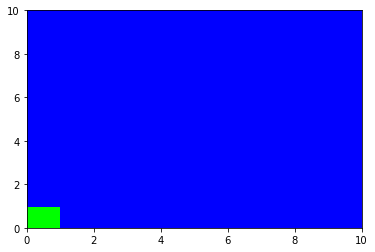

i=0j=1
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5584852


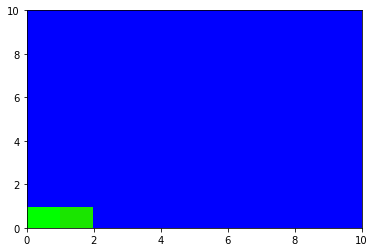

i=0j=2
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5750868


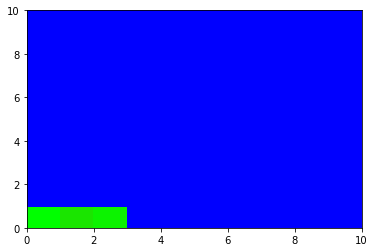

i=0j=3
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.61675346


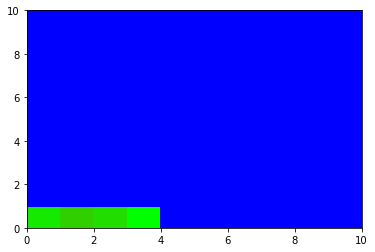

i=0j=4
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5819227


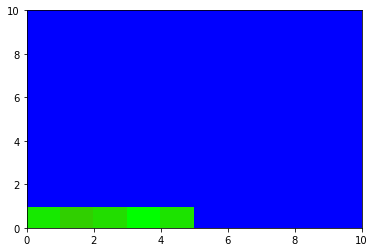

i=0j=5
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5894097


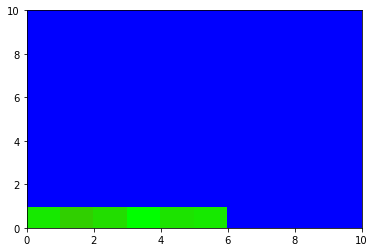

i=0j=6
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5992839


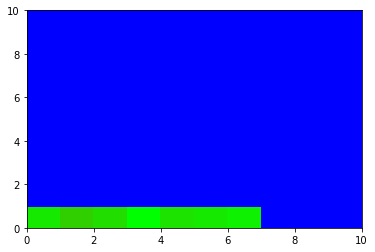

i=0j=7
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6305339


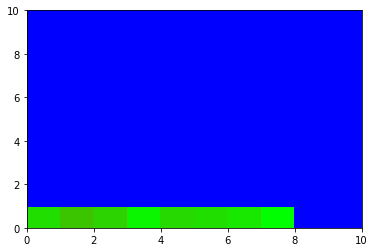

i=0j=8
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5998264


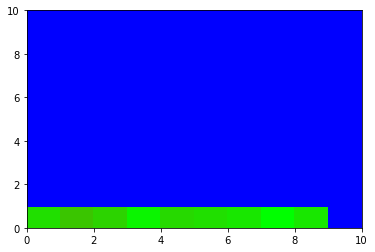

i=0j=9
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6097005


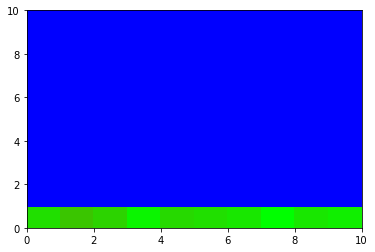

i=1j=0
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5584852


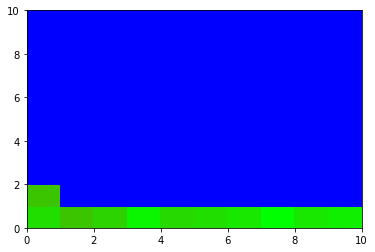

i=1j=1
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5985243


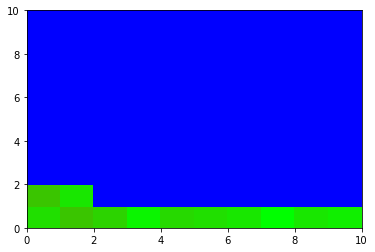

i=1j=2
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.61154515


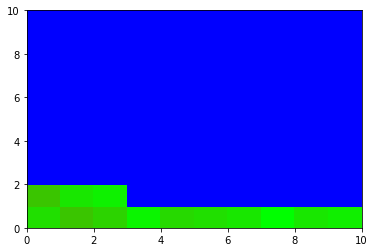

i=1j=3
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.58203125


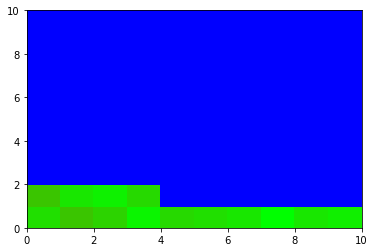

i=1j=4
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5819227


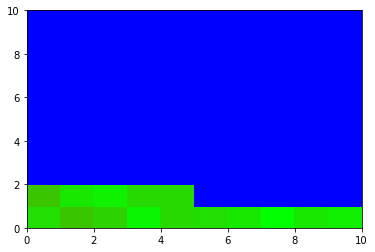

i=1j=5
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.60894096


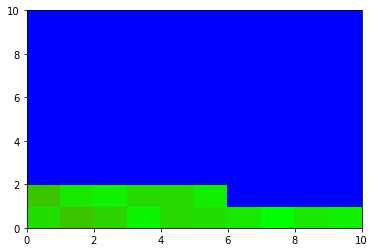

i=1j=6
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6305339


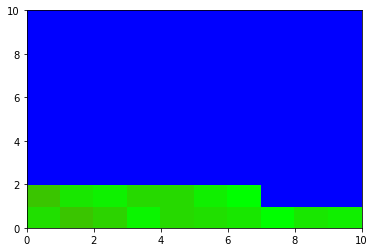

i=1j=7
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5897352


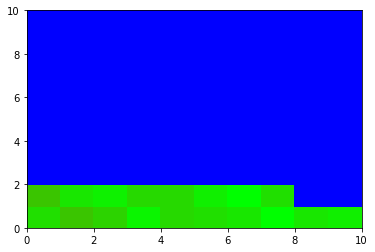

i=1j=8
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6097005


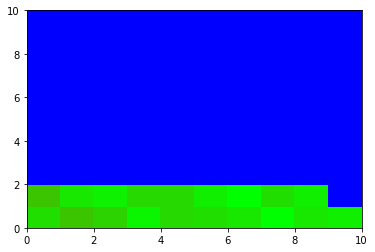

i=1j=9
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5833333


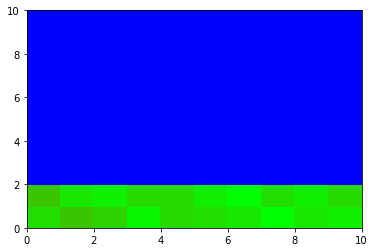

i=2j=0
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5920139


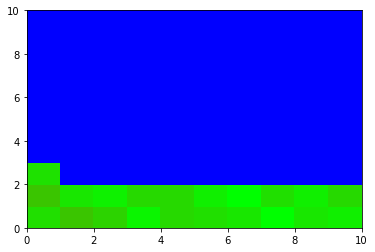

i=2j=1
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.61154515


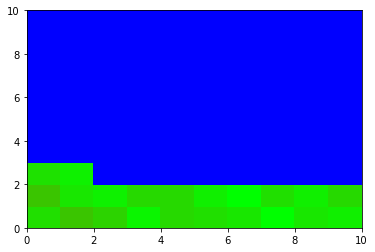

i=2j=2
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.61154515


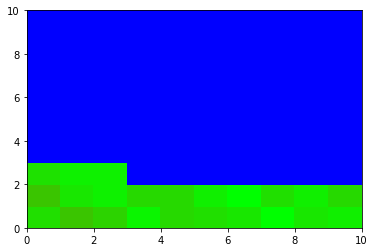

i=2j=3
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5819227


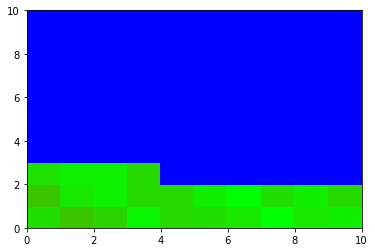

i=2j=4
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5992839


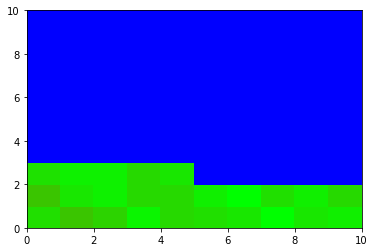

i=2j=5
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6522352


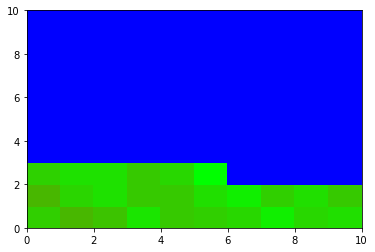

i=2j=6
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.61848956


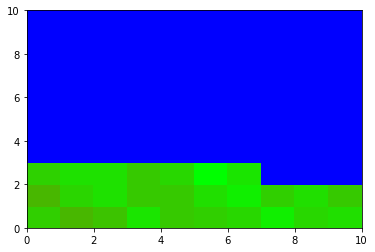

i=2j=7
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5998264


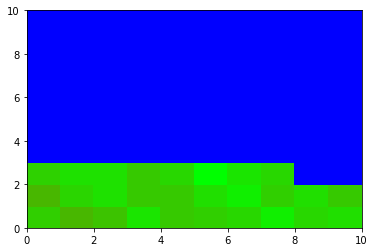

i=2j=8
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6131727


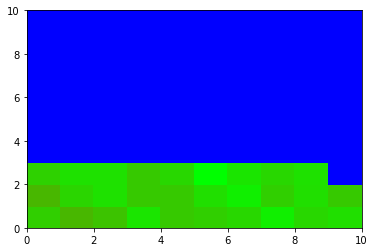

i=2j=9
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6261936


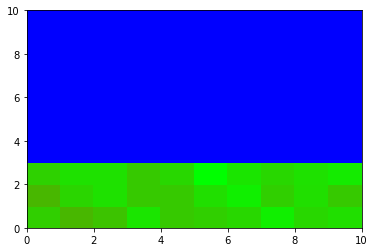

i=3j=0
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6079644


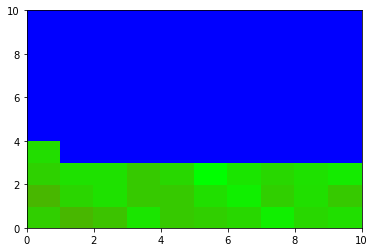

i=3j=1
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.61154515


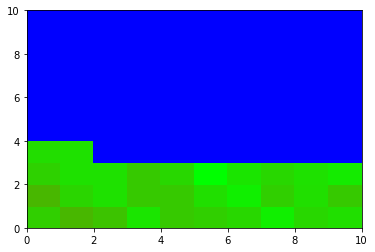

i=3j=2
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5920139


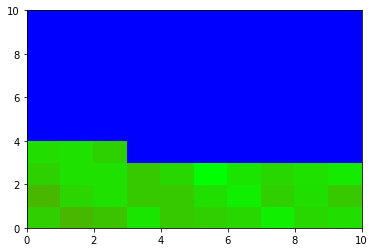

i=3j=3
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6253255


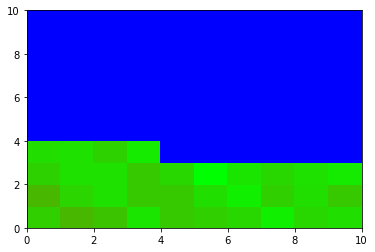

i=3j=4
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6484375


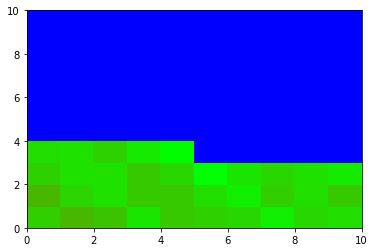

i=3j=5
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.625868


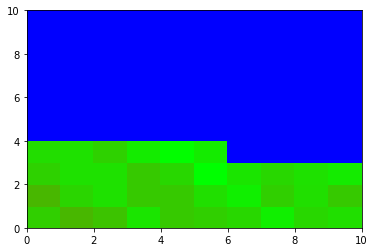

i=3j=6
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5897352


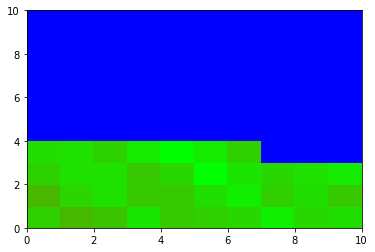

i=3j=7
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.60894096


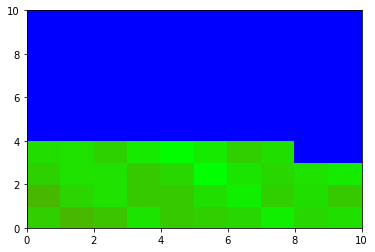

i=3j=8
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6149089


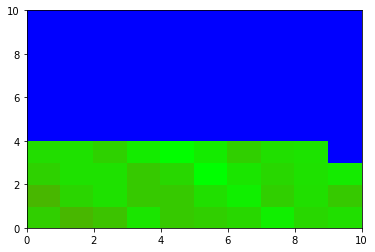

i=3j=9
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6261936


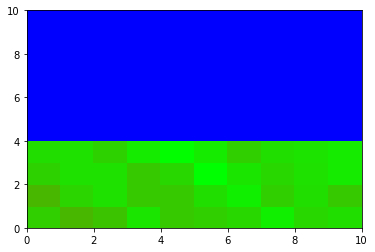

i=4j=0
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.61154515


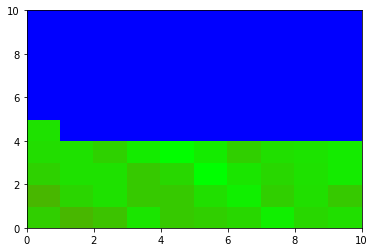

i=4j=1
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6076389


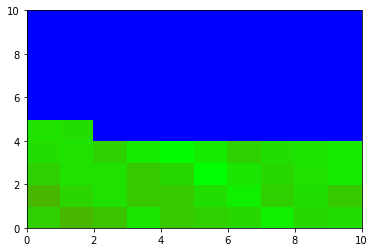

i=4j=2
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6253255


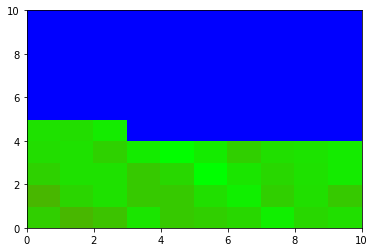

i=4j=3
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6418186


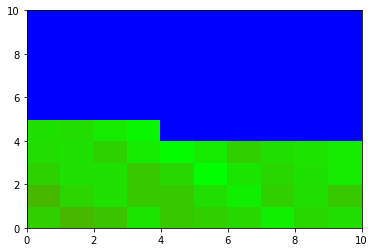

i=4j=4
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6409505


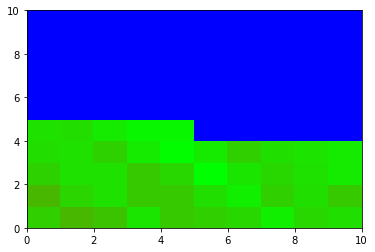

i=4j=5
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5894097


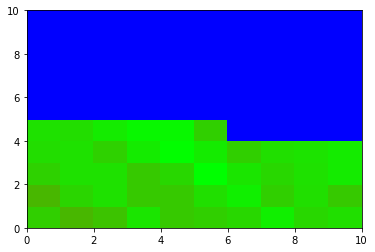

i=4j=6
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.60894096


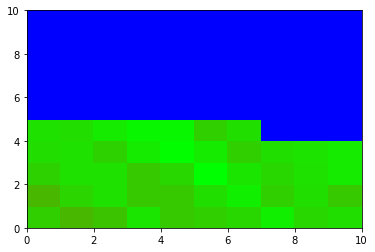

i=4j=7
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6219618


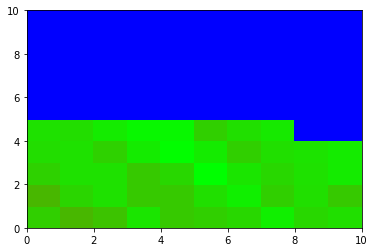

i=4j=8
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6261936


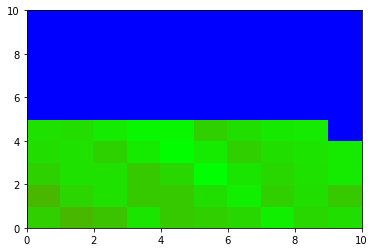

i=4j=9
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6261936


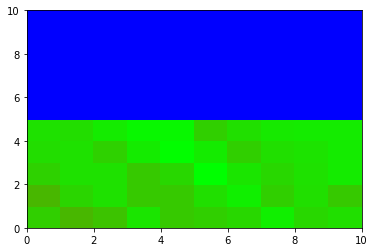

i=5j=0
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6388889


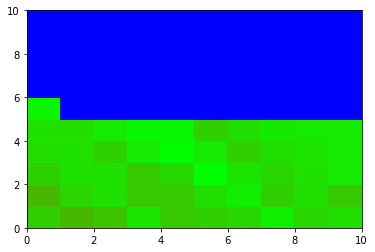

i=5j=1
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6253255


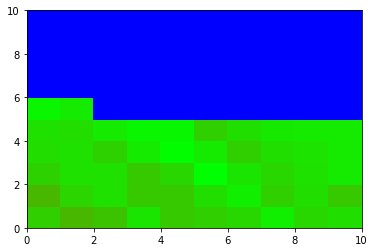

i=5j=2
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6418186


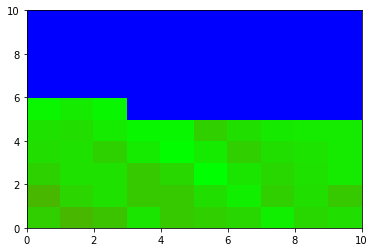

i=5j=3
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.64800346


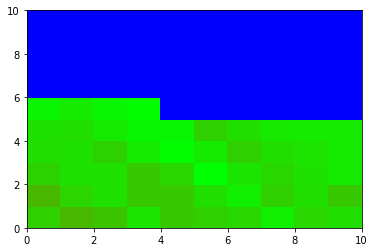

i=5j=4
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.5897352


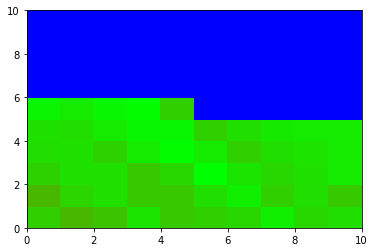

i=5j=5
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6227214


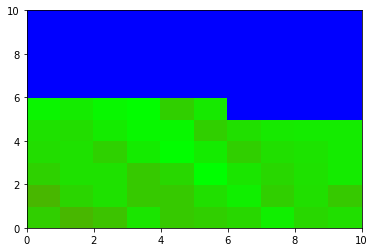

i=5j=6
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6453993


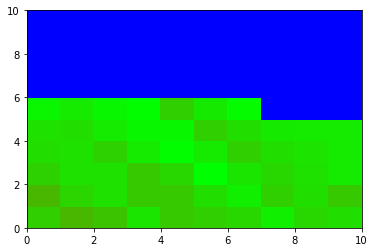

i=5j=7
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6149089


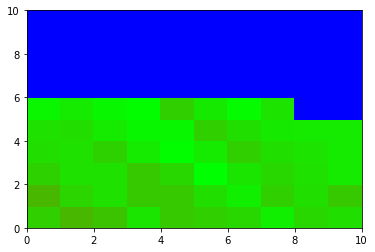

i=5j=8
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.62109375


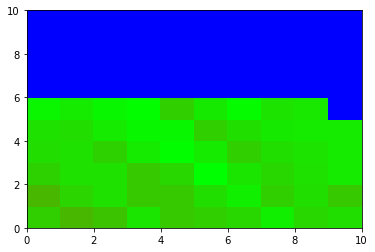

i=5j=9
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6362847


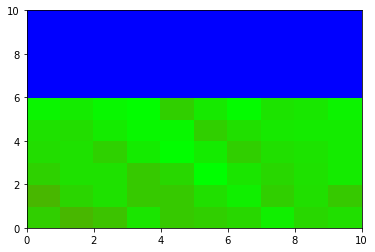

i=6j=0
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6522352


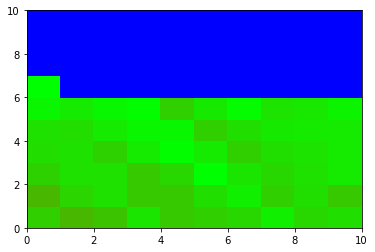

i=6j=1
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6418186


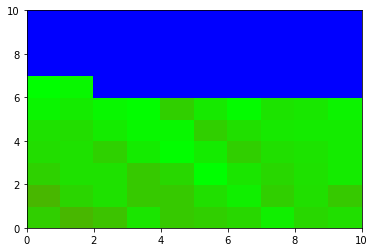

i=6j=2
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6380208


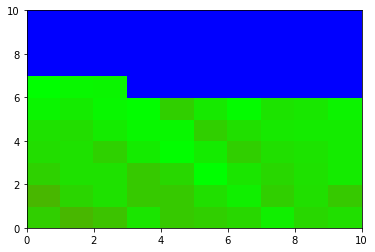

i=6j=3
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.58203125


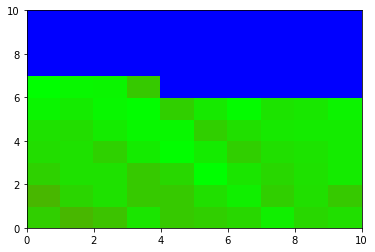

i=6j=4
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6227214


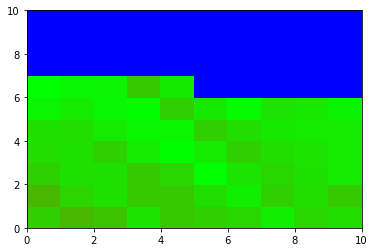

i=6j=5
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6432292


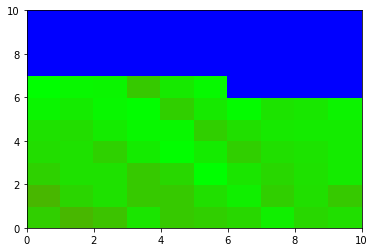

i=6j=6
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6149089


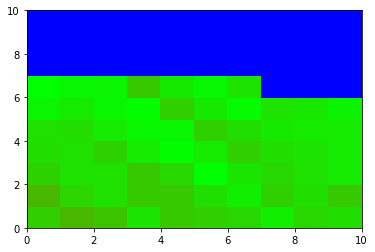

i=6j=7
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.62109375


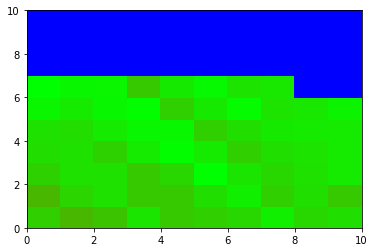

i=6j=8
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.62109375


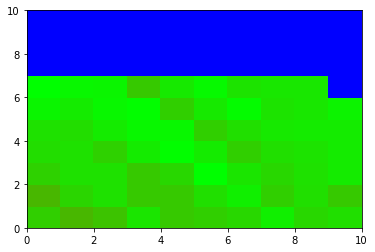

i=6j=9
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6067708


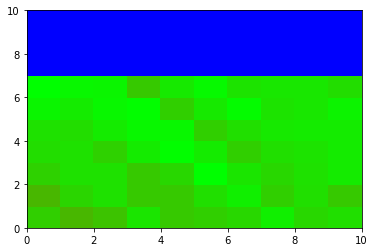

i=7j=0
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.63237846


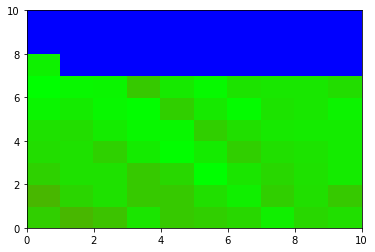

i=7j=1
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6380208


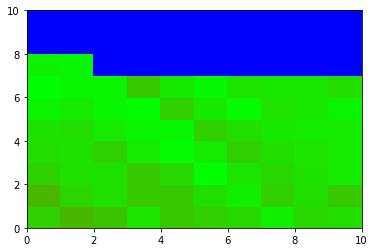

i=7j=2
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.64713544


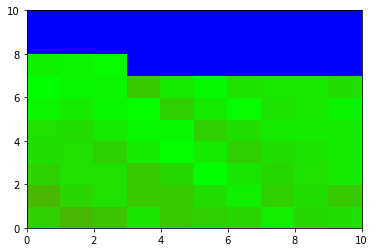

i=7j=3
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6154514


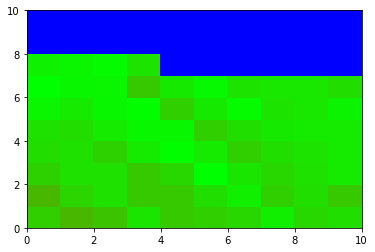

i=7j=4
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6432292


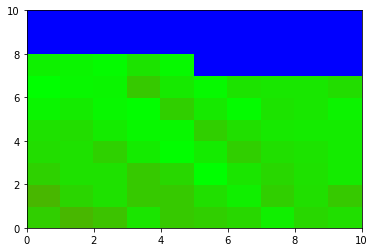

i=7j=5
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6453993


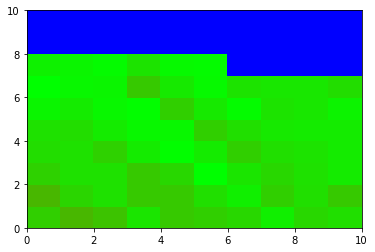

i=7j=6
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6149089


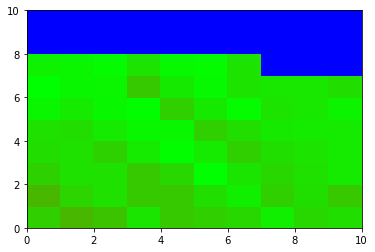

i=7j=7
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6545139


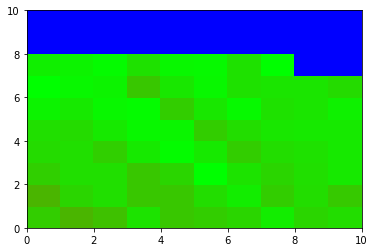

i=7j=8
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6458333


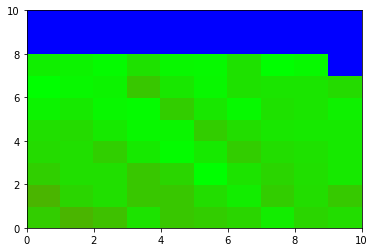

i=7j=9
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6183811


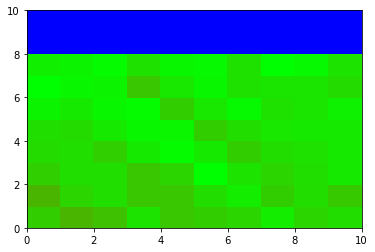

i=8j=0
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6418186


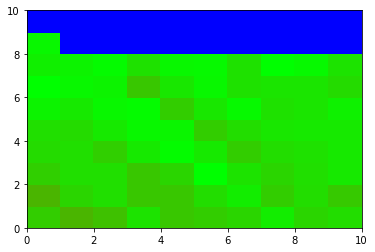

i=8j=1
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.64713544


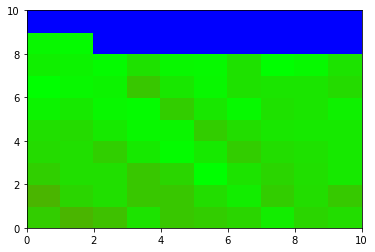

i=8j=2
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6157769


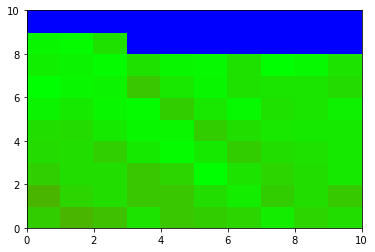

i=8j=3
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6235894


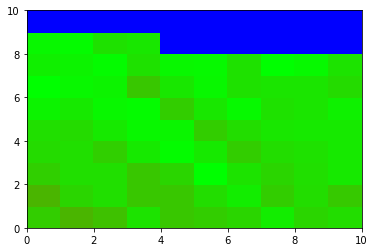

i=8j=4
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6366102


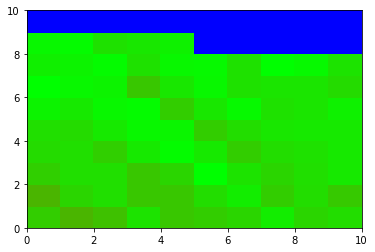

i=8j=5
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6149089


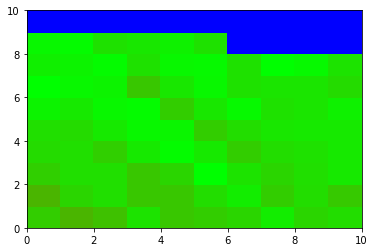

i=8j=6
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6545139


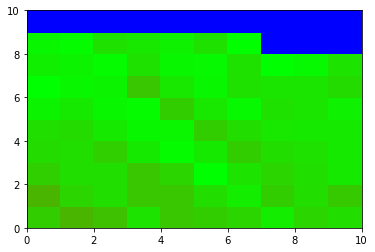

i=8j=7
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6756727


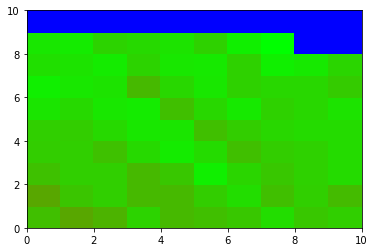

i=8j=8
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.65060765


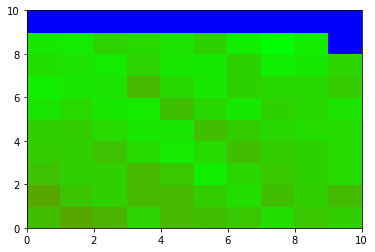

i=8j=9
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6206597


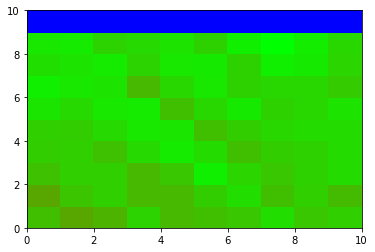

i=9j=0
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.67013884


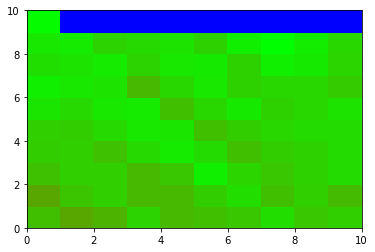

i=9j=1
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.64713544


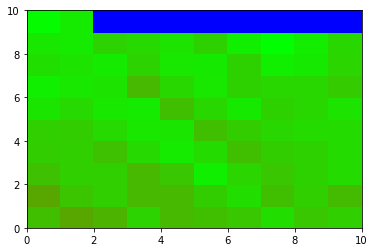

i=9j=2
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6227214


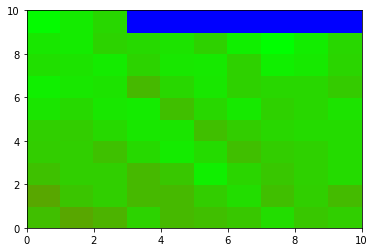

i=9j=3
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6366102


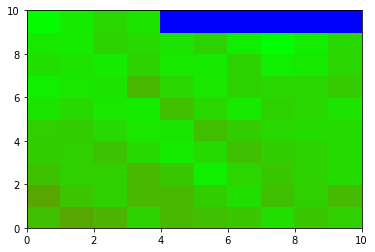

i=9j=4
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6493055


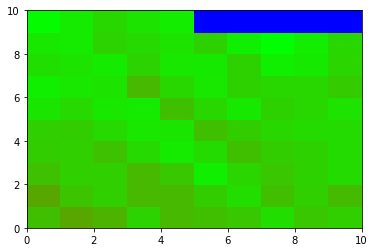

i=9j=5
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6444227


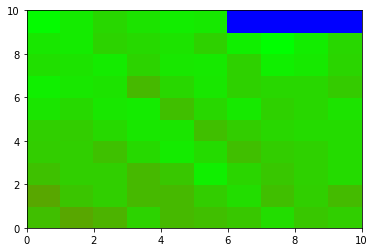

i=9j=6
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6756727


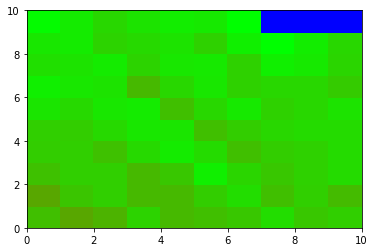

i=9j=7
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6392144


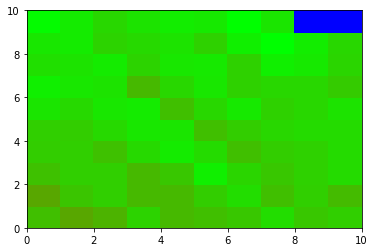

i=9j=8
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6201172


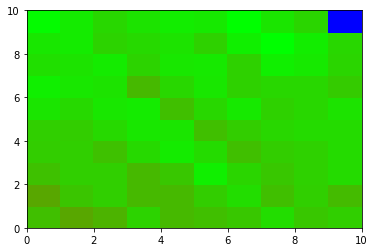

i=9j=9
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
Variance = 0.6548394


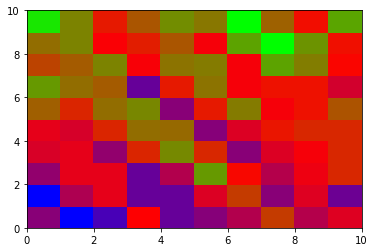

In [8]:
import numpy as np
Plot_Variance_in_Property('air_temperature_2',2013,"May",1,3,3)

File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already 

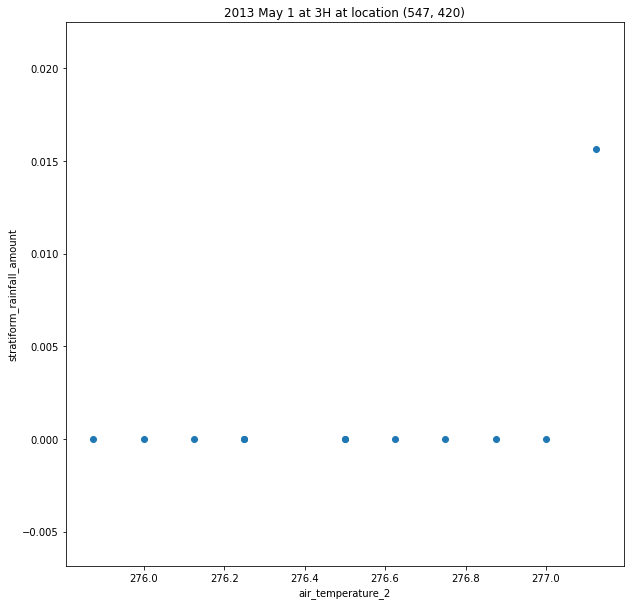

File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_04_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_05_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_06_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_07_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_08_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_09_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_10_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_11_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_00_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_01_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_02_003.nc already exists.
File prods_op_mogreps-uk_20130401_03_03_003.nc already 

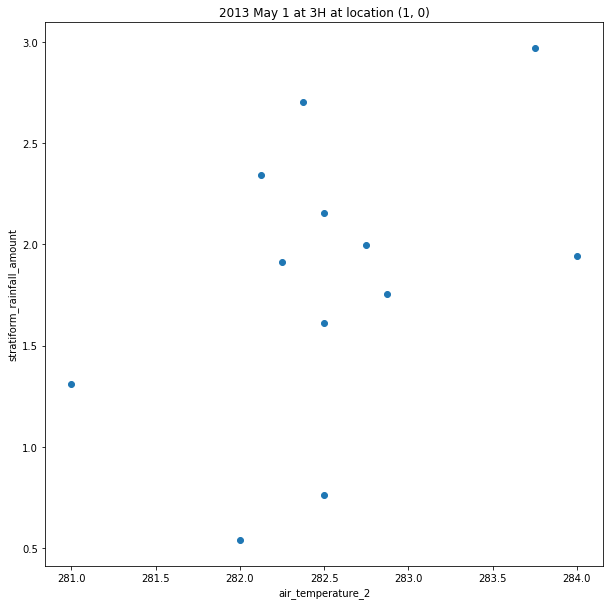

In [76]:
Plot_Variables_Against('air_temperature_2','stratiform_rainfall_amount',547,420,2013,"May",1,3,3)
Plot_Variables_Against('air_temperature_2','stratiform_rainfall_amount',1,0,2013,"May",1,3,3)

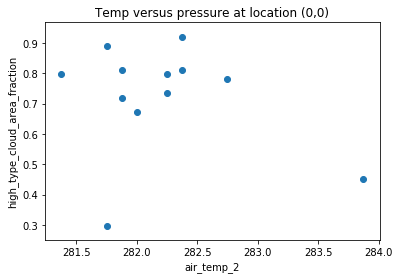

In [30]:
plt.scatter(air_temps,pressures)
plt.title("Temp versus pressure at location (0,0)")
plt.xlabel("air_temp_2")
plt.ylabel("high_type_cloud_area_fraction")
plt.show()

(array([1., 2., 3., 0., 2., 1., 0., 0., 0., 1.]),
 array([281.375, 281.625, 281.875, 282.125, 282.375, 282.625, 282.875,
        283.125, 283.375, 283.625, 283.875]),
 <a list of 10 Patch objects>)

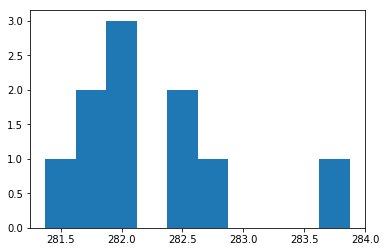

In [7]:
plt.hist(air_temps)